# Breast cancer wisconsin (diagnostic) dataset

#### Data Set Characteristics:

Number of Instances: 569

Number of Attributes: 30 numeric, predictive attributes and the class

Attribute Information:

    - radius (mean of distances from center to points on the perimeter)    
    - texture (standard deviation of gray-scale values)    
    - perimeter    
    - area    
    - smoothness (local variation in radius lengths)         
    - compactness (perimeter^2 / area - 1.0)       
    - concavity (severity of concave portions of the contour)       
    - concave points (number of concave portions of the contour)       
    - symmetry        
    - fractal dimension ("coastline approximation" - 1)
    

    The mean, standard error, and "worst" or largest (mean of the three
    largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 3 is Mean Radius, field
    13 is Radius SE, field 23 is Worst Radius.

    - class:
            - WDBC-Malignant
            - WDBC-Benign


:Missing Attribute Values: None

:Class Distribution: 212 - Malignant, 357 - Benign

:Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

:Donor: Nick Street

:Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.    
O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.    
W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('Project2_cancer_classification.csv')

In [3]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 1. Feature Eng

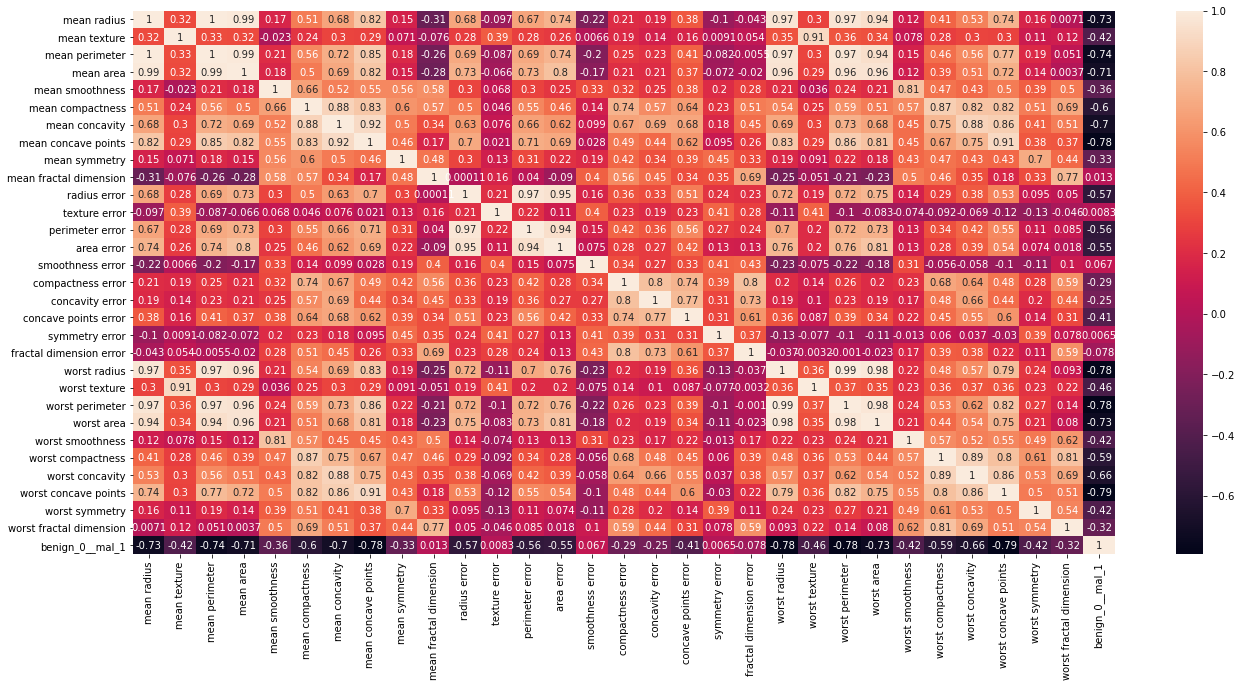

In [4]:
plt.figure(figsize=(22,10))
sns.heatmap(df1.corr(), annot=True);

In [5]:
df1.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [6]:
df=df1.drop(['mean perimeter', 'mean area', 'worst radius', 'worst perimeter', 'worst area', 'texture error', 'mean fractal dimension', 'smoothness error', 
    'worst texture', 'fractal dimension error','symmetry error', 'mean concavity', 'perimeter error', 'radius error', 'worst concave points', 
    'worst compactness', 'worst fractal dimension'], axis=1)

In [7]:
df.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concave points,mean symmetry,area error,compactness error,concavity error,concave points error,worst smoothness,worst concavity,worst symmetry,benign_0__mal_1
0,17.99,10.38,0.11840,0.27760,0.14710,0.2419,153.40,0.04904,0.05373,0.01587,0.1622,0.7119,0.4601,0
1,20.57,17.77,0.08474,0.07864,0.07017,0.1812,74.08,0.01308,0.01860,0.01340,0.1238,0.2416,0.2750,0
2,19.69,21.25,0.10960,0.15990,0.12790,0.2069,94.03,0.04006,0.03832,0.02058,0.1444,0.4504,0.3613,0
3,11.42,20.38,0.14250,0.28390,0.10520,0.2597,27.23,0.07458,0.05661,0.01867,0.2098,0.6869,0.6638,0
4,20.29,14.34,0.10030,0.13280,0.10430,0.1809,94.44,0.02461,0.05688,0.01885,0.1374,0.4000,0.2364,0


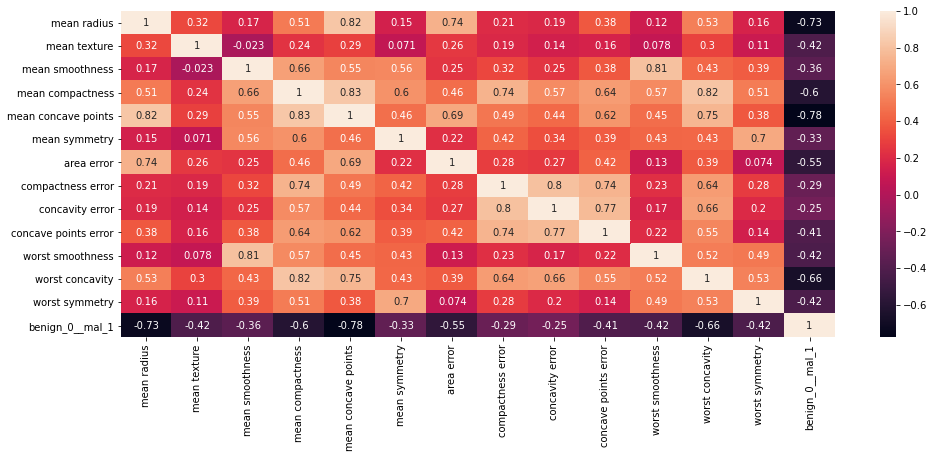

In [8]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True);

In [9]:
df.isnull().sum().any()

False

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean radius           569 non-null    float64
 1   mean texture          569 non-null    float64
 2   mean smoothness       569 non-null    float64
 3   mean compactness      569 non-null    float64
 4   mean concave points   569 non-null    float64
 5   mean symmetry         569 non-null    float64
 6   area error            569 non-null    float64
 7   compactness error     569 non-null    float64
 8   concavity error       569 non-null    float64
 9   concave points error  569 non-null    float64
 10  worst smoothness      569 non-null    float64
 11  worst concavity       569 non-null    float64
 12  worst symmetry        569 non-null    float64
 13  benign_0__mal_1       569 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 62.4 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.37000,15.78000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.84000,21.80000,39.28000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.09587,0.10530,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.09263,0.13040,0.34540
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.03350,0.07400,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.17920,0.19570,0.30400
area error,569.0,40.337079,45.491006,6.802000,17.850000,24.53000,45.19000,542.20000
compactness error,569.0,0.025478,0.017908,0.002252,0.013080,0.02045,0.03245,0.13540
concavity error,569.0,0.031894,0.030186,0.000000,0.015090,0.02589,0.04205,0.39600
concave points error,569.0,0.011796,0.006170,0.000000,0.007638,0.01093,0.01471,0.05279


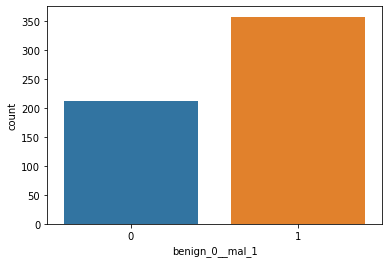

In [12]:
sns.countplot(x='benign_0__mal_1', data=df);

## 2. Train Test Split

In [13]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

## 3. Scaling Data

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 4.Creating the Model
For a binary classification problem    
model.compile(optimizer='rmsprop',     
              loss='binary_crossentropy',    
              metrics=['accuracy'])

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [16]:
X_train.shape

(426, 13)

In [17]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=13,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## 5. Training the Model

In [18]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/300
14/14 [==============================] - 1s 61ms/step - loss: 0.7091 - val_loss: 0.6997
Epoch 2/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6962 - val_loss: 0.6869
Epoch 3/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6848 - val_loss: 0.6752
Epoch 4/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6695 - val_loss: 0.6653
Epoch 5/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6642 - val_loss: 0.6553
Epoch 6/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6510 - val_loss: 0.6440
Epoch 7/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6413 - val_loss: 0.6336
Epoch 8/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6313 - val_loss: 0.6234
Epoch 9/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6152 - val_loss: 0.6125
Epoch 10/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6156 - val_loss: 0.6013
Epoch 11

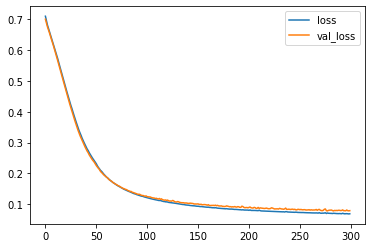

In [19]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot();

## 5.1. Early Stopping   
#### We are free to choose any epochs without wondering whether it is too big.

If val_loss increases as loss decreases, this means overfitting.  
In case of too much training,  we can use early stopping to track the val_loss and stop training once it begins increasing too much!

In [20]:
model = Sequential()
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [22]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6677 - val_loss: 0.6635
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6593 - val_loss: 0.6574
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6578 - val_loss: 0.6503
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6444 - val_loss: 0.6424
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6386 - val_loss: 0.6347
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6264 - val_loss: 0.6269
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6218 - val_loss: 0.6186
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6189 - val_loss: 0.6102
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6068 - val_loss: 0.6011
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6030 - val_loss: 0.5919
Epoch 11

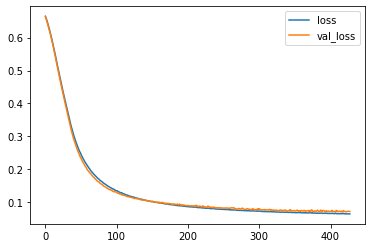

In [23]:
pd.DataFrame(model.history.history).plot();

In [24]:
pred = model.predict_classes(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,pred), '\n', '\n')
print(classification_report(y_test,pred))

[[53  2]
 [ 1 87]] 
 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.98      0.99      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



C:\Users\aslik\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
pred = model.predict_classes(X_train)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_train,pred), '\n', '\n')
print(classification_report(y_train,pred))

[[152   5]
 [  3 266]] 
 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       157
           1       0.98      0.99      0.99       269

    accuracy                           0.98       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426



## 5.2. Adding in DropOut Layers

In [26]:
from tensorflow.keras.layers import Dropout

model2 = Sequential()

model2.add(Dense(units=12,activation='relu'))
model2.add(Dropout(0.1))

model2.add(Dense(units=1,activation='sigmoid'))
model2.add(Dropout(0.1))

model2.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model2.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/400
14/14 [==============================] - 0s 11ms/step - loss: 1.5694 - val_loss: 0.6886
Epoch 2/400
14/14 [==============================] - 0s 3ms/step - loss: 1.2518 - val_loss: 0.6793
Epoch 3/400
14/14 [==============================] - 0s 3ms/step - loss: 1.5957 - val_loss: 0.6706
Epoch 4/400
14/14 [==============================] - 0s 3ms/step - loss: 1.2602 - val_loss: 0.6615
Epoch 5/400
14/14 [==============================] - 0s 3ms/step - loss: 1.8344 - val_loss: 0.6534
Epoch 6/400
14/14 [==============================] - 0s 3ms/step - loss: 1.4384 - val_loss: 0.6449
Epoch 7/400
14/14 [==============================] - 0s 3ms/step - loss: 1.7415 - val_loss: 0.6352
Epoch 8/400
14/14 [==============================] - 0s 3ms/step - loss: 1.4680 - val_loss: 0.6247
Epoch 9/400
14/14 [==============================] - 0s 3ms/step - loss: 1.4561 - val_loss: 0.6121
Epoch 10/400
14/14 [==============================] - 0s 3ms/step - loss: 1.4872 - val_loss: 0.5989
Epoch 11

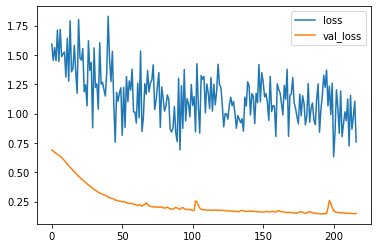

In [28]:
pd.DataFrame(model2.history.history).plot();

In [29]:
pred = model2.predict_classes(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,pred), '\n', '\n')
print(classification_report(y_test,pred))

[[54  1]
 [ 2 86]] 
 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



C:\Users\aslik\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## 6. Model Evaluation

In [30]:
model3 = Sequential()
model3.add(Dense(units=13,activation='relu'))
model3.add(Dense(units=1,activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam')

model3.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), verbose=1)

Epoch 1/300
14/14 [==============================] - 1s 10ms/step - loss: 0.7105 - val_loss: 0.6962
Epoch 2/300
14/14 [==============================] - 0s 4ms/step - loss: 0.7003 - val_loss: 0.6845
Epoch 3/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6842 - val_loss: 0.6739
Epoch 4/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6697 - val_loss: 0.6632
Epoch 5/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6607 - val_loss: 0.6533
Epoch 6/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6478 - val_loss: 0.6437
Epoch 7/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6359 - val_loss: 0.6338
Epoch 8/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6272 - val_loss: 0.6236
Epoch 9/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6163 - val_loss: 0.6136
Epoch 10/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6113 - val_loss: 0.6033
Epoch 11

In [31]:
pred = model3.predict_classes(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,pred), '\n', '\n')
print(classification_report(y_test,pred))

[[53  2]
 [ 1 87]] 
 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.98      0.99      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

